**Cau 4**

In [4]:
from google.colab import drive 
drive.mount('/content/drive/')

Mounted at /content/drive/


In [8]:
%cd /content/drive/MyDrive/AI_THI

/content/drive/MyDrive/AI_THI


In [9]:
import cv2
import numpy as np
from keras.models import load_model
from sklearn.metrics import accuracy_score
from keras.datasets import mnist
from google.colab.patches import cv2_imshow

In [10]:
# Load module
model = load_model('/content/drive/MyDrive/lbr/Handwritten-Multiple-Digits-Recognizer/mnist.h5')

1/1 [==============================] - 0s 165ms/step
8 - 100 %
1/1 [==============================] - 0s 32ms/step
7 - 91 %
1/1 [==============================] - 0s 45ms/step
0 - 99 %
1/1 [==============================] - 0s 43ms/step
2 - 82 %
1/1 [==============================] - 0s 39ms/step
6 - 98 %
1/1 [==============================] - 0s 44ms/step
5 - 99 %
1/1 [==============================] - 0s 37ms/step
3 - 99 %
1/1 [==============================] - 0s 51ms/step
2 - 99 %
1/1 [==============================] - 0s 35ms/step
4 - 99 %
1/1 [==============================] - 0s 41ms/step
4 - 90 %


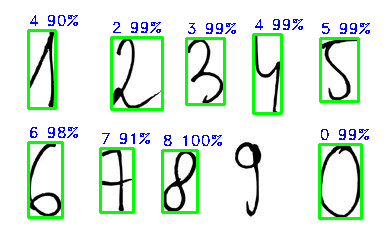

In [11]:
file_path = '/content/drive/MyDrive/AI_THI/de2_c4.jpg'

image = cv2.imread(file_path, cv2.IMREAD_COLOR)
gray = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)
ret, th = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

contours = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
for cnt in contours:
  x, y, w, h = cv2.boundingRect(cnt)
  digit = th[y:y + h, x:x + w]
  resized_digit = cv2.resize(digit, (18, 18))
  padded_digit = np.pad(resized_digit, ((5, 5), (5, 5)), "constant", constant_values=0)

  digit = padded_digit.reshape(1, 28, 28, 1)
  digit = digit / 255.0

  pred = model.predict([digit])[0]
  final_pred = np.argmax(pred) 
  print(final_pred, end=" - ")

  data = str(final_pred) + ' ' + str(int(max(pred) * 100)) + '%'
  print(int(max(pred) * 100), "%")
  if(int(max(pred) * 100) > 85):
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2) 
    font = cv2.FONT_HERSHEY_DUPLEX 
    fontScale = 0.5
    color = (255, 0, 0)
    thickness = 1 
    cv2.putText(image, data, (x, y - 5), font, 0.5, (255, 0, 0), 1) 
cv2_imshow(image)